In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rows_to_keep = [5,6]
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# File Prepping

## DOH Data

In [2]:
dailyreport = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 05 DOH Data Collect - Daily Report.csv')
cases_b0 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_0.csv', low_memory = False)
cases_b1 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_1.csv', low_memory = False)
cases_b2 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_2.csv', low_memory = False)
cases_b3 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_3.csv', low_memory = False)

# Combine all case batches
cases = pd.concat([cases_b1, cases_b2, cases_b3])

# Get only useful data from dailyreport
dailyreport = dailyreport[['reportdate', 'region', 'province', 'city_mun', 'conf_asym', 'conf_mild', 'conf_severe', 'conf_crit', 'conf_mod']]

### Filtering out to Marikina

In [6]:
# Convert dates from objects/strings to datetime
dailyreport['reportdate'] = pd.to_datetime(dailyreport['reportdate'])
cases['DateDied'] = pd.to_datetime(cases['DateDied'])

# Filetering out to only Marikina
marikina = dailyreport[dailyreport['city_mun'] == 'CITY OF MARIKINA']
marikina_cases = cases[cases['CityMunRes'] == 'CITY OF MARIKINA']
marikina_cases = marikina_cases.reset_index().drop('index', axis=1)
marikina_cases = marikina_cases[marikina_cases['HealthStatus'] == 'DIED']

## NetLogo Data

### Reading Files

- [x] Daily Active Cases
- [x] Spread of Disease
- [x] Daily total cases
- [x] Daily Deaths
- [ ] Contact Tracing
- [ ] Daily Chart
- [ ] Daily total recoveries
- [x] Total Vaccinations

In [7]:
# ----------Daily Active Cases--------------
ac_D45AVER1 = pd.read_csv(r'02 New Code\Test-1\00 D-45-AVER\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D45AVER2 = pd.read_csv(r'02 New Code\Test-2\00 D-45-AVER\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D45AVER3 = pd.read_csv(r'02 New Code\Test-3\00 D-45-AVER\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])

ac_D1NULL1 = pd.read_csv(r'02 New Code\Test-1\01 D-1-NULL\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D1INAC1 = pd.read_csv(r'02 New Code\Test-1\02 D-1-INAC\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D1VIRA1 = pd.read_csv(r'02 New Code\Test-1\03 D-1-VIRA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D1MRNA1 = pd.read_csv(r'02 New Code\Test-1\04 D-1-MRNA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D23NULL1 = pd.read_csv(r'02 New Code\Test-1\05 D-23-NULL\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D23INAC1 = pd.read_csv(r'02 New Code\Test-1\06 D-23-INAC\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D23VIRA1 = pd.read_csv(r'02 New Code\Test-1\07 D-23-VIRA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D23MRNA1 = pd.read_csv(r'02 New Code\Test-1\08 D-23-MRNA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D45NULL1 = pd.read_csv(r'02 New Code\Test-1\09 D-45-NULL\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D45INAC1 = pd.read_csv(r'02 New Code\Test-1\10 D-45-INAC\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D45VIRA1 = pd.read_csv(r'02 New Code\Test-1\11 D-45-VIRA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D45MRNA1 = pd.read_csv(r'02 New Code\Test-1\12 D-45-MRNA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND1NULL1 = pd.read_csv(r'02 New Code\Test-1\13 ND-1-NULL\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND1INAC1 = pd.read_csv(r'02 New Code\Test-1\14 ND-1-INAC\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND1VIRA1 = pd.read_csv(r'02 New Code\Test-1\15 ND-1-VIRA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND1MRNA1 = pd.read_csv(r'02 New Code\Test-1\16 ND-1-MRNA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND23NULL1 = pd.read_csv(r'02 New Code\Test-1\17 ND-23-NULL\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND23INAC1 = pd.read_csv(r'02 New Code\Test-1\18 ND-23-INAC\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND23VIRA1 = pd.read_csv(r'02 New Code\Test-1\19 ND-23-VIRA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND23MRNA1 = pd.read_csv(r'02 New Code\Test-1\20 ND-23-MRNA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND45NULL1 = pd.read_csv(r'02 New Code\Test-1\21 ND-45-NULL\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND45INAC1 = pd.read_csv(r'02 New Code\Test-1\22 ND-45-INAC\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND45VIRA1 = pd.read_csv(r'02 New Code\Test-1\23 ND-45-VIRA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_ND45MRNA1 = pd.read_csv(r'02 New Code\Test-1\24 ND-45-MRNA\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])

ac_D45AVER0 = pd.read_csv(r'02 New Code\Test-1\25 D-45-AVER-0\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D45AVER25 = pd.read_csv(r'02 New Code\Test-1\26 D-45-AVER-25\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D45AVER50 = pd.read_csv(r'02 New Code\Test-1\27 D-45-AVER-50\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D45AVER75 = pd.read_csv(r'02 New Code\Test-1\28 D-45-AVER-75\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])
ac_D45AVER99 = pd.read_csv(r'02 New Code\Test-1\29 D-45-AVER-99\AICCovid19_Vax_v2_2 Daily Active Cases.csv', skiprows=17, usecols=[0,1])


# -----------Daily Deaths----------------
dd_D45AVER1 = pd.read_csv(r'02 New Code\Test-1\00 D-45-AVER\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D45AVER2 = pd.read_csv(r'02 New Code\Test-2\00 D-45-AVER\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D45AVER3 = pd.read_csv(r'02 New Code\Test-3\00 D-45-AVER\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])

dd_D1NULL1 = pd.read_csv(r'02 New Code\Test-1\01 D-1-NULL\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D1INAC1 = pd.read_csv(r'02 New Code\Test-1\02 D-1-INAC\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D1VIRA1 = pd.read_csv(r'02 New Code\Test-1\03 D-1-VIRA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D1MRNA1 = pd.read_csv(r'02 New Code\Test-1\04 D-1-MRNA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D23NULL1 = pd.read_csv(r'02 New Code\Test-1\05 D-23-NULL\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D23INAC1 = pd.read_csv(r'02 New Code\Test-1\06 D-23-INAC\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D23VIRA1 = pd.read_csv(r'02 New Code\Test-1\07 D-23-VIRA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D23MRNA1 = pd.read_csv(r'02 New Code\Test-1\08 D-23-MRNA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D45NULL1 = pd.read_csv(r'02 New Code\Test-1\09 D-45-NULL\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D45INAC1 = pd.read_csv(r'02 New Code\Test-1\10 D-45-INAC\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D45VIRA1 = pd.read_csv(r'02 New Code\Test-1\11 D-45-VIRA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D45MRNA1 = pd.read_csv(r'02 New Code\Test-1\12 D-45-MRNA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND1NULL1 = pd.read_csv(r'02 New Code\Test-1\13 ND-1-NULL\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND1INAC1 = pd.read_csv(r'02 New Code\Test-1\14 ND-1-INAC\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND1VIRA1 = pd.read_csv(r'02 New Code\Test-1\15 ND-1-VIRA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND1MRNA1 = pd.read_csv(r'02 New Code\Test-1\16 ND-1-MRNA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND23NULL1 = pd.read_csv(r'02 New Code\Test-1\17 ND-23-NULL\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND23INAC1 = pd.read_csv(r'02 New Code\Test-1\18 ND-23-INAC\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND23VIRA1 = pd.read_csv(r'02 New Code\Test-1\19 ND-23-VIRA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND23MRNA1 = pd.read_csv(r'02 New Code\Test-1\20 ND-23-MRNA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND45NULL1 = pd.read_csv(r'02 New Code\Test-1\21 ND-45-NULL\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND45INAC1 = pd.read_csv(r'02 New Code\Test-1\22 ND-45-INAC\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND45VIRA1 = pd.read_csv(r'02 New Code\Test-1\23 ND-45-VIRA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_ND45MRNA1 = pd.read_csv(r'02 New Code\Test-1\24 ND-45-MRNA\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])

dd_D45AVER0 = pd.read_csv(r'02 New Code\Test-1\25 D-45-AVER-0\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D45AVER25 = pd.read_csv(r'02 New Code\Test-1\26 D-45-AVER-25\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D45AVER50 = pd.read_csv(r'02 New Code\Test-1\27 D-45-AVER-50\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D45AVER75 = pd.read_csv(r'02 New Code\Test-1\28 D-45-AVER-75\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])
dd_D45AVER99 = pd.read_csv(r'02 New Code\Test-1\29 D-45-AVER-99\AICCovid19_Vax_v2_2 Daily Deaths.csv', skiprows=19, usecols=[1,5,9])


#----------Spread of Disease-------------
sod_D45AVER1 = pd.read_csv(r'02 New Code\Test-1\00 D-45-AVER\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D45AVER2 = pd.read_csv(r'02 New Code\Test-2\00 D-45-AVER\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D45AVER3 = pd.read_csv(r'02 New Code\Test-3\00 D-45-AVER\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])

sod_D1NULL1 = pd.read_csv(r'02 New Code\Test-1\01 D-1-NULL\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D1INAC1 = pd.read_csv(r'02 New Code\Test-1\02 D-1-INAC\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D1VIRA1 = pd.read_csv(r'02 New Code\Test-1\03 D-1-VIRA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D1MRNA1 = pd.read_csv(r'02 New Code\Test-1\04 D-1-MRNA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D23NULL1 = pd.read_csv(r'02 New Code\Test-1\05 D-23-NULL\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D23INAC1 = pd.read_csv(r'02 New Code\Test-1\06 D-23-INAC\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D23VIRA1 = pd.read_csv(r'02 New Code\Test-1\07 D-23-VIRA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D23MRNA1 = pd.read_csv(r'02 New Code\Test-1\08 D-23-MRNA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D45NULL1 = pd.read_csv(r'02 New Code\Test-1\09 D-45-NULL\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D45INAC1 = pd.read_csv(r'02 New Code\Test-1\10 D-45-INAC\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D45VIRA1 = pd.read_csv(r'02 New Code\Test-1\11 D-45-VIRA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D45MRNA1 = pd.read_csv(r'02 New Code\Test-1\12 D-45-MRNA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND1NULL1 = pd.read_csv(r'02 New Code\Test-1\13 ND-1-NULL\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND1INAC1 = pd.read_csv(r'02 New Code\Test-1\14 ND-1-INAC\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND1VIRA1 = pd.read_csv(r'02 New Code\Test-1\15 ND-1-VIRA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND1MRNA1 = pd.read_csv(r'02 New Code\Test-1\16 ND-1-MRNA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND23NULL1 = pd.read_csv(r'02 New Code\Test-1\17 ND-23-NULL\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND23INAC1 = pd.read_csv(r'02 New Code\Test-1\18 ND-23-INAC\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND23VIRA1 = pd.read_csv(r'02 New Code\Test-1\19 ND-23-VIRA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND23MRNA1 = pd.read_csv(r'02 New Code\Test-1\20 ND-23-MRNA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND45NULL1 = pd.read_csv(r'02 New Code\Test-1\21 ND-45-NULL\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND45INAC1 = pd.read_csv(r'02 New Code\Test-1\22 ND-45-INAC\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND45VIRA1 = pd.read_csv(r'02 New Code\Test-1\23 ND-45-VIRA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_ND45MRNA1 = pd.read_csv(r'02 New Code\Test-1\24 ND-45-MRNA\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])

sod_D45AVER0 = pd.read_csv(r'02 New Code\Test-1\25 D-45-AVER-0\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D45AVER25 = pd.read_csv(r'02 New Code\Test-1\26 D-45-AVER-25\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D45AVER50 = pd.read_csv(r'02 New Code\Test-1\27 D-45-AVER-50\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D45AVER75 = pd.read_csv(r'02 New Code\Test-1\28 D-45-AVER-75\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])
sod_D45AVER99 = pd.read_csv(r'02 New Code\Test-1\29 D-45-AVER-99\AICCovid19_Vax_v2_2 Spread of Disease.csv', skiprows=19, usecols=[1,5,9])


#----------Daily total cases-------------
dtc_D45AVER1 = pd.read_csv(r'02 New Code\Test-1\00 D-45-AVER\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D45AVER2 = pd.read_csv(r'02 New Code\Test-2\00 D-45-AVER\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D45AVER3 = pd.read_csv(r'02 New Code\Test-3\00 D-45-AVER\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])

dtc_D1NULL1 = pd.read_csv(r'02 New Code\Test-1\01 D-1-NULL\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D1INAC1 = pd.read_csv(r'02 New Code\Test-1\02 D-1-INAC\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D1VIRA1 = pd.read_csv(r'02 New Code\Test-1\03 D-1-VIRA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D1MRNA1 = pd.read_csv(r'02 New Code\Test-1\04 D-1-MRNA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D23NULL1 = pd.read_csv(r'02 New Code\Test-1\05 D-23-NULL\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D23INAC1 = pd.read_csv(r'02 New Code\Test-1\06 D-23-INAC\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D23VIRA1 = pd.read_csv(r'02 New Code\Test-1\07 D-23-VIRA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D23MRNA1 = pd.read_csv(r'02 New Code\Test-1\08 D-23-MRNA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D45NULL1 = pd.read_csv(r'02 New Code\Test-1\09 D-45-NULL\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D45INAC1 = pd.read_csv(r'02 New Code\Test-1\10 D-45-INAC\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D45VIRA1 = pd.read_csv(r'02 New Code\Test-1\11 D-45-VIRA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D45MRNA1 = pd.read_csv(r'02 New Code\Test-1\12 D-45-MRNA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND1NULL1 = pd.read_csv(r'02 New Code\Test-1\13 ND-1-NULL\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND1INAC1 = pd.read_csv(r'02 New Code\Test-1\14 ND-1-INAC\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND1VIRA1 = pd.read_csv(r'02 New Code\Test-1\15 ND-1-VIRA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND1MRNA1 = pd.read_csv(r'02 New Code\Test-1\16 ND-1-MRNA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND23NULL1 = pd.read_csv(r'02 New Code\Test-1\17 ND-23-NULL\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND23INAC1 = pd.read_csv(r'02 New Code\Test-1\18 ND-23-INAC\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND23VIRA1 = pd.read_csv(r'02 New Code\Test-1\19 ND-23-VIRA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND23MRNA1 = pd.read_csv(r'02 New Code\Test-1\20 ND-23-MRNA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND45NULL1 = pd.read_csv(r'02 New Code\Test-1\21 ND-45-NULL\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND45INAC1 = pd.read_csv(r'02 New Code\Test-1\22 ND-45-INAC\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND45VIRA1 = pd.read_csv(r'02 New Code\Test-1\23 ND-45-VIRA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_ND45MRNA1 = pd.read_csv(r'02 New Code\Test-1\24 ND-45-MRNA\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])

dtc_D45AVER0 = pd.read_csv(r'02 New Code\Test-1\25 D-45-AVER-0\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D45AVER25 = pd.read_csv(r'02 New Code\Test-1\26 D-45-AVER-25\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D45AVER50 = pd.read_csv(r'02 New Code\Test-1\27 D-45-AVER-50\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D45AVER75 = pd.read_csv(r'02 New Code\Test-1\28 D-45-AVER-75\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])
dtc_D45AVER99 = pd.read_csv(r'02 New Code\Test-1\29 D-45-AVER-99\AICCovid19_Vax_v2_2 Daily total cases.csv', skiprows=17 , usecols=[1])

#----------Total Vaccinations-------------
tv_D45AVER1 = pd.read_csv(r'02 New Code\Test-1\00 D-45-AVER\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D45AVER2 = pd.read_csv(r'02 New Code\Test-2\00 D-45-AVER\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D45AVER3 = pd.read_csv(r'02 New Code\Test-3\00 D-45-AVER\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])

tv_D1NULL1 = pd.read_csv(r'02 New Code\Test-1\01 D-1-NULL\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D1INAC1 = pd.read_csv(r'02 New Code\Test-1\02 D-1-INAC\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D1VIRA1 = pd.read_csv(r'02 New Code\Test-1\03 D-1-VIRA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D1MRNA1 = pd.read_csv(r'02 New Code\Test-1\04 D-1-MRNA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D23NULL1 = pd.read_csv(r'02 New Code\Test-1\05 D-23-NULL\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D23INAC1 = pd.read_csv(r'02 New Code\Test-1\06 D-23-INAC\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D23VIRA1 = pd.read_csv(r'02 New Code\Test-1\07 D-23-VIRA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D23MRNA1 = pd.read_csv(r'02 New Code\Test-1\08 D-23-MRNA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D45NULL1 = pd.read_csv(r'02 New Code\Test-1\09 D-45-NULL\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D45INAC1 = pd.read_csv(r'02 New Code\Test-1\10 D-45-INAC\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D45VIRA1 = pd.read_csv(r'02 New Code\Test-1\11 D-45-VIRA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D45MRNA1 = pd.read_csv(r'02 New Code\Test-1\12 D-45-MRNA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND1NULL1 = pd.read_csv(r'02 New Code\Test-1\13 ND-1-NULL\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND1INAC1 = pd.read_csv(r'02 New Code\Test-1\14 ND-1-INAC\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND1VIRA1 = pd.read_csv(r'02 New Code\Test-1\15 ND-1-VIRA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND1MRNA1 = pd.read_csv(r'02 New Code\Test-1\16 ND-1-MRNA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND23NULL1 = pd.read_csv(r'02 New Code\Test-1\17 ND-23-NULL\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND23INAC1 = pd.read_csv(r'02 New Code\Test-1\18 ND-23-INAC\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND23VIRA1 = pd.read_csv(r'02 New Code\Test-1\19 ND-23-VIRA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND23MRNA1 = pd.read_csv(r'02 New Code\Test-1\20 ND-23-MRNA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND45NULL1 = pd.read_csv(r'02 New Code\Test-1\21 ND-45-NULL\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND45INAC1 = pd.read_csv(r'02 New Code\Test-1\22 ND-45-INAC\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND45VIRA1 = pd.read_csv(r'02 New Code\Test-1\23 ND-45-VIRA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_ND45MRNA1 = pd.read_csv(r'02 New Code\Test-1\24 ND-45-MRNA\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])

tv_D45AVER0 = pd.read_csv(r'02 New Code\Test-1\25 D-45-AVER-0\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D45AVER25 = pd.read_csv(r'02 New Code\Test-1\26 D-45-AVER-25\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D45AVER50 = pd.read_csv(r'02 New Code\Test-1\27 D-45-AVER-50\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D45AVER75 = pd.read_csv(r'02 New Code\Test-1\28 D-45-AVER-75\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])
tv_D45AVER99 = pd.read_csv(r'02 New Code\Test-1\29 D-45-AVER-99\AICCovid19_Vax_v2_2 Total Vaccinations.csv', skiprows=17 , usecols=[1])

## Joining by Scenarios

In [8]:
D45AVER1_ticks = pd.concat([ac_D45AVER1, sod_D45AVER1, dtc_D45AVER1, dd_D45AVER1, tv_D45AVER1], axis=1)
D45AVER2_ticks = pd.concat([ac_D45AVER2, sod_D45AVER2, dtc_D45AVER2, dd_D45AVER2, tv_D45AVER2], axis=1)
D45AVER3_ticks = pd.concat([ac_D45AVER3, sod_D45AVER3, dtc_D45AVER3, dd_D45AVER3, tv_D45AVER3], axis=1)

D1NULL1_ticks = pd.concat([ac_D1NULL1, sod_D1NULL1, dtc_D1NULL1, dd_D1NULL1, tv_D1NULL1], axis=1)
D1INAC1_ticks = pd.concat([ac_D1INAC1, sod_D1INAC1, dtc_D1INAC1, dd_D1INAC1, tv_D1INAC1], axis=1)
D1VIRA1_ticks = pd.concat([ac_D1VIRA1, sod_D1VIRA1, dtc_D1VIRA1, dd_D1VIRA1, tv_D1VIRA1], axis=1)
D1MRNA1_ticks = pd.concat([ac_D1MRNA1, sod_D1MRNA1, dtc_D1MRNA1, dd_D1MRNA1, tv_D1MRNA1], axis=1)
D23NULL1_ticks = pd.concat([ac_D23NULL1, sod_D23NULL1, dtc_D23NULL1, dd_D23NULL1, tv_D23NULL1], axis=1)
D23INAC1_ticks = pd.concat([ac_D23INAC1, sod_D23INAC1, dtc_D23INAC1, dd_D23INAC1, tv_D23INAC1], axis=1)
D23VIRA1_ticks = pd.concat([ac_D23VIRA1, sod_D23VIRA1, dtc_D23VIRA1, dd_D23VIRA1, tv_D23VIRA1], axis=1)
D23MRNA1_ticks = pd.concat([ac_D23MRNA1, sod_D23MRNA1, dtc_D23MRNA1, dd_D23MRNA1, tv_D23MRNA1], axis=1)
D45NULL1_ticks = pd.concat([ac_D45NULL1, sod_D45NULL1, dtc_D45NULL1, dd_D45NULL1, tv_D45NULL1], axis=1)
D45INAC1_ticks = pd.concat([ac_D45INAC1, sod_D45INAC1, dtc_D45INAC1, dd_D45INAC1, tv_D45INAC1], axis=1)
D45VIRA1_ticks = pd.concat([ac_D45VIRA1, sod_D45VIRA1, dtc_D45VIRA1, dd_D45VIRA1, tv_D45VIRA1], axis=1)
D45MRNA1_ticks = pd.concat([ac_D45MRNA1, sod_D45MRNA1, dtc_D45MRNA1, dd_D45MRNA1, tv_D45MRNA1], axis=1)
ND1NULL1_ticks = pd.concat([ac_ND1NULL1, sod_ND1NULL1, dtc_ND1NULL1, dd_ND1NULL1, tv_ND1NULL1], axis=1)
ND1INAC1_ticks = pd.concat([ac_ND1INAC1, sod_ND1INAC1, dtc_ND1INAC1, dd_ND1INAC1, tv_ND1INAC1], axis=1)
ND1VIRA1_ticks = pd.concat([ac_ND1VIRA1, sod_ND1VIRA1, dtc_ND1VIRA1, dd_ND1VIRA1, tv_ND1VIRA1], axis=1)
ND1MRNA1_ticks = pd.concat([ac_ND1MRNA1, sod_ND1MRNA1, dtc_ND1MRNA1, dd_ND1MRNA1, tv_ND1MRNA1], axis=1)
ND23NULL1_ticks = pd.concat([ac_ND23NULL1, sod_ND23NULL1, dtc_ND23NULL1, dd_ND23NULL1, tv_ND23NULL1], axis=1)
ND23INAC1_ticks = pd.concat([ac_ND23INAC1, sod_ND23INAC1, dtc_ND23INAC1, dd_ND23INAC1, tv_ND23INAC1], axis=1)
ND23VIRA1_ticks = pd.concat([ac_ND23VIRA1, sod_ND23VIRA1, dtc_ND23VIRA1, dd_ND23VIRA1, tv_ND23VIRA1], axis=1)
ND23MRNA1_ticks = pd.concat([ac_ND23MRNA1, sod_ND23MRNA1, dtc_ND23MRNA1, dd_ND23MRNA1, tv_ND23MRNA1], axis=1)
ND45NULL1_ticks = pd.concat([ac_ND45NULL1, sod_ND45NULL1, dtc_ND45NULL1, dd_ND45NULL1, tv_ND45NULL1], axis=1)
ND45INAC1_ticks = pd.concat([ac_ND45INAC1, sod_ND45INAC1, dtc_ND45INAC1, dd_ND45INAC1, tv_ND45INAC1], axis=1)
ND45VIRA1_ticks = pd.concat([ac_ND45VIRA1, sod_ND45VIRA1, dtc_ND45VIRA1, dd_ND45VIRA1, tv_ND45VIRA1], axis=1)
ND45MRNA1_ticks = pd.concat([ac_ND45MRNA1, sod_ND45MRNA1, dtc_ND45MRNA1, dd_ND45MRNA1, tv_ND45MRNA1], axis=1)

D45AVER0_ticks = pd.concat([ac_D45AVER0, sod_D45AVER0, dtc_D45AVER0, dd_D45AVER0, tv_D45AVER0], axis=1)
D45AVER25_ticks = pd.concat([ac_D45AVER25, sod_D45AVER25, dtc_D45AVER25, dd_D45AVER25, tv_D45AVER25], axis=1)
D45AVER50_ticks = pd.concat([ac_D45AVER50, sod_D45AVER50, dtc_D45AVER50, dd_D45AVER50, tv_D45AVER50], axis=1)
D45AVER75_ticks = pd.concat([ac_D45AVER75, sod_D45AVER75, dtc_D45AVER75, dd_D45AVER75, tv_D45AVER75], axis=1)
D45AVER99_ticks = pd.concat([ac_D45AVER99, sod_D45AVER99, dtc_D45AVER99, dd_D45AVER99, tv_D45AVER99], axis=1)

## Renaming Columns

In [9]:
D45AVER1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D45AVER2_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D45AVER3_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']

D1NULL1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D1INAC1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D1VIRA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D1MRNA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D23NULL1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D23INAC1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D23VIRA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D23MRNA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D45NULL1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D45INAC1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D45VIRA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
D45MRNA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']

ND1NULL1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
ND1INAC1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
ND1VIRA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
ND1MRNA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']

ND23NULL1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
ND23INAC1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
ND23VIRA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
ND23MRNA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']

ND45NULL1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
ND45INAC1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
ND45VIRA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']
ND45MRNA1_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax']

D45AVER0_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior deaths', 'comorbid deaths', 'vax']
D45AVER25_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior deaths', 'comorbid deaths', 'vax']
D45AVER50_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior deaths', 'comorbid deaths', 'vax']
D45AVER75_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior deaths', 'comorbid deaths', 'vax']
D45AVER99_ticks.columns = ['days', 'cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior deaths', 'comorbid deaths', 'vax']


## Ticks to Days

In [10]:
dticks = int(1440/10)
ndticks = int(1440/3)
D45AVER1 = D45AVER1_ticks.iloc[1::dticks, :]
D45AVER2 = D45AVER2_ticks.iloc[1::dticks, :]
D45AVER3 = D45AVER2_ticks.iloc[1::dticks, :]
D1NULL1 = D1NULL1_ticks.iloc[1::dticks, :]
D1INAC1 = D1INAC1_ticks.iloc[1::dticks, :]
D1VIRA1 = D1VIRA1_ticks.iloc[1::dticks, :]
D1MRNA1 = D1MRNA1_ticks.iloc[1::dticks, :]
D23NULL1 = D23NULL1_ticks.iloc[1::dticks, :]
D23INAC1 = D23INAC1_ticks.iloc[1::dticks, :]
D23VIRA1 = D23VIRA1_ticks.iloc[1::dticks, :]
D23MRNA1 = D23MRNA1_ticks.iloc[1::dticks, :]
D45NULL1 = D45NULL1_ticks.iloc[1::dticks, :]
D45INAC1 = D45INAC1_ticks.iloc[1::dticks, :]
D45VIRA1 = D45VIRA1_ticks.iloc[1::dticks, :]
D45MRNA1 = D45MRNA1_ticks.iloc[1::dticks, :]
ND1NULL1 = ND1NULL1_ticks.iloc[1::ndticks, :]
ND1INAC1 = ND1INAC1_ticks.iloc[1::ndticks, :]
ND1VIRA1 = ND1VIRA1_ticks.iloc[1::ndticks, :]
ND1MRNA1 = ND1MRNA1_ticks.iloc[1::ndticks, :]
ND23NULL1 = ND23NULL1_ticks.iloc[1::ndticks, :]
ND23INAC1 = ND23INAC1_ticks.iloc[1::ndticks, :]
ND23VIRA1 = ND23VIRA1_ticks.iloc[1::ndticks, :]
ND23MRNA1 = ND23MRNA1_ticks.iloc[1::ndticks, :]
ND45NULL1 = ND45NULL1_ticks.iloc[1::ndticks, :]
ND45INAC1 = ND45INAC1_ticks.iloc[1::ndticks, :]
ND45VIRA1 = ND45VIRA1_ticks.iloc[1::ndticks, :]
ND45MRNA1 = ND45MRNA1_ticks.iloc[1::ndticks, :]
D45AVER0 = D45AVER0_ticks.iloc[1::dticks, :]
D45AVER25 = D45AVER25_ticks.iloc[1::dticks, :]
D45AVER50 = D45AVER50_ticks.iloc[1::dticks, :]
D45AVER75 = D45AVER75_ticks.iloc[1::dticks, :]
D45AVER99 = D45AVER99_ticks.iloc[1::dticks, :]


## Averaging Runs

In [11]:
D45AVER = pd.concat((D45AVER1, D45AVER2, D45AVER3))
D45AVER_avg = D45AVER.groupby(D45AVER.index)
D45AVER = D45AVER_avg.mean()

# Markina Data from July 08, 2021 to Dec 15, 2021

[Guide](https://www.interviewqs.com/ddi-code-snippets/select-pandas-dataframe-rows-between-two-dates)

In [12]:
start_date = '2021-07-08'
end_date = '2021-12-15'

In [13]:
marikina_mask = (marikina['reportdate'] >= start_date) & (marikina['reportdate'] <= end_date)
marikina_cases_mask = (marikina_cases['DateDied'] >= start_date) & (marikina_cases['DateDied'] <= end_date)

In [14]:
marikina_date = marikina.loc[marikina_mask].groupby([marikina['reportdate'].dt.date]).sum()
marikina_cases_date = marikina_cases.loc[marikina_cases_mask].groupby([marikina_cases['DateDied'].dt.date]).sum()

In [15]:
marikina_date['conf_cases'] = marikina_date['conf_asym'] + marikina_date['conf_mod'] + marikina_date['conf_severe'] + marikina_date['conf_mild'] + marikina_date['conf_crit']
marikina_date['conf_other'] = marikina_date['conf_mod'] + marikina_date['conf_crit'] + marikina_date['conf_mild']

In [18]:
marikina_died = marikina_cases_date.size
marikina_total_cases = marikina_date['conf_cases'].sum()

In [19]:
print("Percent Died in Marikina", (marikina_died/marikina_total_cases) *100, "%")

Percent Died in Marikina 0.8341845420497106 %


# Graphing

## Scaling

In [20]:
#Scale NetLogo data to fit DOH graph
to_scale = D45AVER
y_factor = 1.1
x_factor = 1

yscale = to_scale.drop('days', axis=1)
xscale = to_scale.drop(['cases', 'asym', 'moderate', 'severe', 'total_cases', 'total_deaths', 'senior_deaths', 'comorbid_deaths', 'vax'], axis=1)
yscaled = yscale * y_factor
xscaled = xscale * x_factor
scaled = pd.concat((yscaled, xscaled.days), 1)

C:\Users\Daft\AppData\Local\Temp\ipykernel_96396\1429831284.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  scaled = pd.concat((yscaled, xscaled.days), 1)


In [21]:
# Change Values here to Plot Below
plot1 = D45AVER0
plot2 = D45AVER25
plot3 = D45AVER50
plot4 = D45AVER75
plot5 = D45AVER99

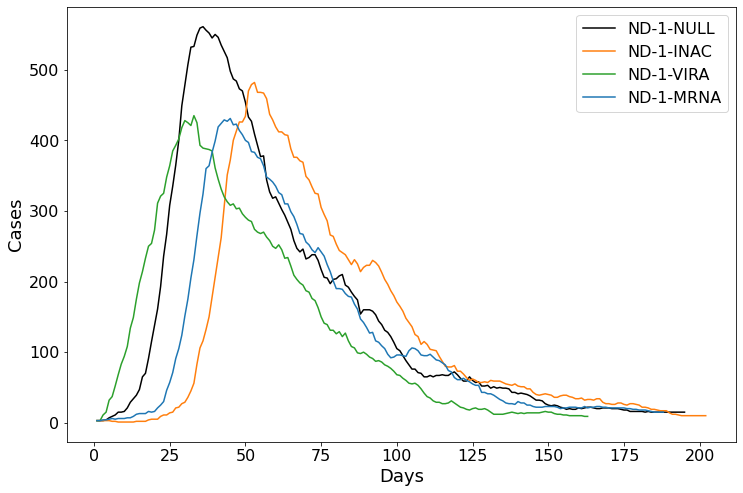

In [146]:
#Active Cases

plt.rcParams['font.size'] = '16'
plt.figure(figsize=(12,8))
plt.plot(plot1.days, plot1.cases, color="black")
plt.plot(plot2.days, plot2.cases, color="tab:orange")
plt.plot(plot3.days, plot3.cases, color="tab:green")
plt.plot(plot4.days, plot4.cases, color="tab:blue")
#plt.plot(plot5.days, plot5.cases, color ="tab:red")
plt.xlabel("Days", fontsize=18)
plt.ylabel("Cases", fontsize=18)

plt.legend(['ND-1-NULL', 'ND-1-INAC', 'ND-1-VIRA', 'ND-1-MRNA'])
#plt.legend(['0%', '25%', '50%', '75%', '99%'])
plt.show()

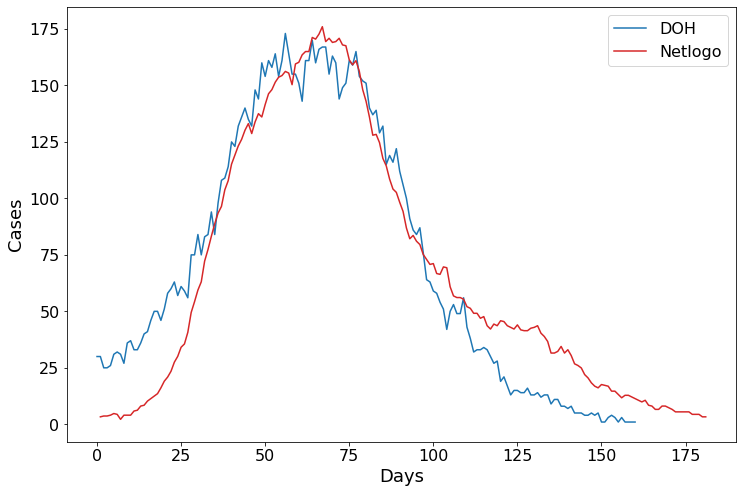

In [22]:
# Accuracy of Active Cases
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(12,8))

plt.plot(marikina_date.reset_index().index, marikina_date.conf_cases, color="tab:blue")
plt.plot(scaled.days, scaled.cases, color="tab:red")
plt.plot()
plt.xlabel("Days", fontsize=18)
plt.ylabel("Cases", fontsize=18)
plt.legend(['DOH', 'Netlogo', 'Trimmed'])
plt.show()

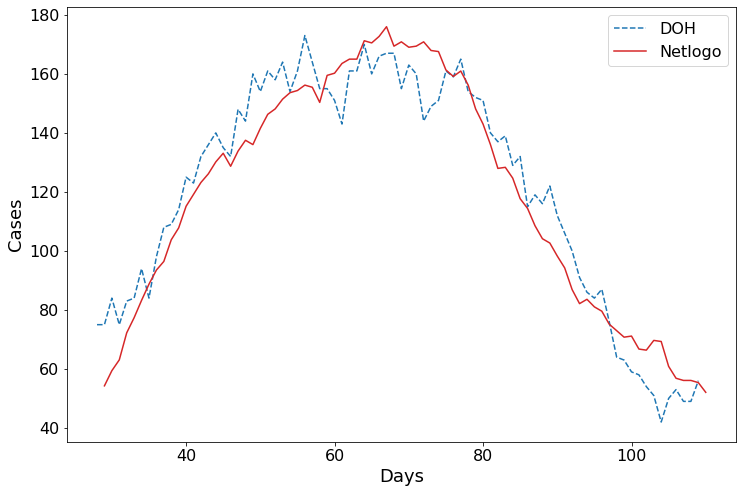

In [23]:
# Accurate portion of the graph
trimmed = scaled.iloc[28:110]
marikina_trimmed = marikina_date.reset_index().iloc[28:110]


plt.rcParams['font.size'] = '16'
plt.figure(figsize=(12,8))

plt.plot(marikina_trimmed.index, marikina_trimmed.conf_cases, '--', color="tab:blue")
plt.plot(trimmed.days, trimmed.cases, color='tab:red')
plt.plot()
plt.xlabel("Days", fontsize=18)
plt.ylabel("Cases", fontsize=18)
plt.legend(['DOH', 'Netlogo'])
plt.show()

In [24]:
#--- RUN THIS TO EXPORT GRAPHS---
#scaled.to_csv(r'C:\Users\Daft\Desktop\NetLogo\tests\02 New Code\Test-1\Percent Error (1_).csv')
#marikina_date.to_csv(r'C:\Users\Daft\Desktop\NetLogo\tests\02 New Code\Test-1\marikina.csv')

## Spread of Disease

In [25]:
#Change this value to check spread of disease of a scenario
plot = D45AVER

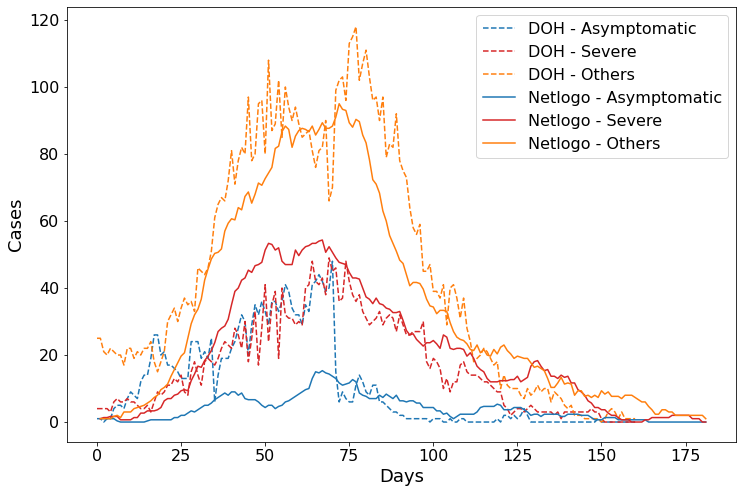

In [26]:
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(12,8))

plt.plot(marikina_date.reset_index().index, marikina_date.conf_asym, '--', color="tab:blue")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_severe, '--', color="tab:red")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_other, '--', color="tab:orange")

#plt.plot(plot.days, plot.n, color="black")
plt.plot(plot.days, plot.asym, color="tab:blue")

plt.plot(plot.days, plot.severe, color="tab:red")
plt.plot(plot.days, plot.moderate, color="tab:orange")

plt.plot()
plt.xlabel("Days", fontsize=18)
plt.ylabel("Cases", fontsize=18)


plt.legend(['DOH - Asymptomatic', 'DOH - Severe', 'DOH - Others', 'Netlogo - Asymptomatic', 'Netlogo - Severe', 'Netlogo - Others'])

#plt.legend(['Alert Level 1', 'Alert Levels 2&3', 'Alert Levels 4&5'])
#plt.legend(['D-1-NULL', 'D-1-INAC', 'D-1-VIRA', 'D-1-MRNA'])
plt.show()

## Daily Deaths

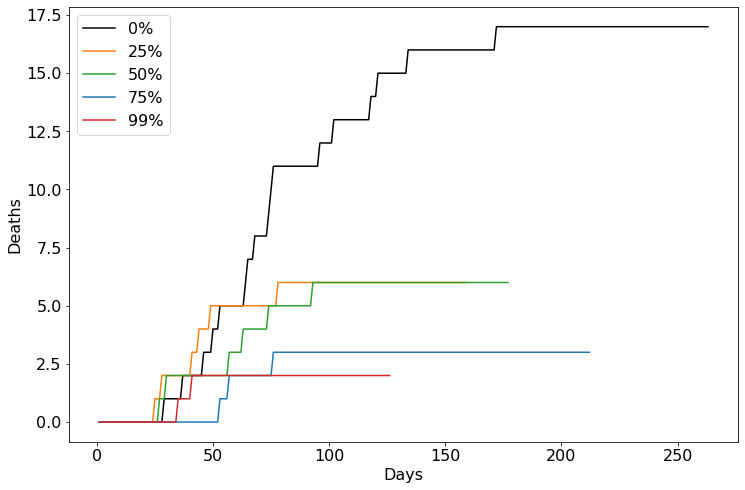

In [31]:
plt.figure(figsize=(12,8))

plt.plot(plot1.days, plot1.total_deaths, color="black")
plt.plot(plot2.days, plot2.total_deaths, color="tab:orange")
plt.plot(plot3.days, plot3.total_deaths, color="tab:green")
plt.plot(plot4.days, plot4.total_deaths, color="tab:blue")
plt.plot(plot5.days, plot5.total_deaths, color="tab:red")
plt.ylabel("Deaths")
plt.xlabel("Days")

plt.legend(['0%', '25%', '50%', '75%', '99%'])
#plt.legend(['No Vaccine', 'Inactivated', 'Viral Vector', 'mRNA'])

plt.show()

In [30]:
percent_died_NULL = (D23NULL1.total_deaths.max() / D23NULL1.total_cases.max()) * 100
percent_died_MRNA = (D23MRNA1.total_deaths.max() / D23MRNA1.total_cases.max()) * 100
percent_died_INAC = (D23INAC1.total_deaths.max() / D23INAC1.total_cases.max()) * 100
percent_died_VIRA = (D23VIRA1.total_deaths.max() / D23VIRA1.total_cases.max()) * 100
percent_died_AVER = (D45AVER.total_deaths.max() / D45AVER.total_cases.max()) * 100

percent_died_0 = (D45AVER0.total_deaths.max() / D45AVER0.total_cases.max()) * 100
percent_died_25 = (D45AVER25.total_deaths.max() / D45AVER25.total_cases.max()) * 100
percent_died_50 = (D45AVER50.total_deaths.max() / D45AVER50.total_cases.max()) * 100
percent_died_75 = (D45AVER75.total_deaths.max() / D45AVER75.total_cases.max()) * 100
percent_died_99 = (D45AVER99.total_deaths.max() / D45AVER99.total_cases.max()) * 100

#print("NULL", percent_died_NULL)
#print("INAC", percent_died_INAC)
#print("VIRA", percent_died_VIRA)
#print("MRNA", percent_died_MRNA)
#print("AVER", percent_died_AVER)

print("0% run:", percent_died_0, "% died")
print("25% run:", percent_died_25, "% died")
print("50% run:", percent_died_50, "% died")
print("75% run:", percent_died_75, "% died")
print("99% run:", percent_died_99, "% died")

0% run: 1.4795474325500435 % died
25% run: 0.6880733944954129 % died
50% run: 0.8995502248875562 % died
75% run: 0.42075736325385693 % died
99% run: 0.4291845493562232 % died


# End of Code